# Asset Pricing 2: Homework 3

### Trent Potter

### Winter 2025

---


In [44]:
# Re-load necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot


# Reload the dataset
df = pd.read_csv('yields.csv')

# Convert percentage yields to log yields
for col in df.columns[1:]:  # Skip 'date' column
    df[col] = (1 + df[col] / 100).apply(np.log)

# Compute first differences (log yield changes)
df_diff = df.copy()
df_diff.iloc[:, 1:] = df.iloc[:, 1:].diff()

# Drop the first row (NaN values due to differencing)
df_diff = df_diff.dropna()

# Compute covariance matrix of log yield changes
dy_cov = df_diff.iloc[:, 1:].cov()

# Display results
dy_cov

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10
M1,0.000012,0.000008,0.000007,0.000006,0.000005,0.000005,0.000005,0.000005,0.000004,0.000004
M2,0.000008,0.000009,0.000008,0.000007,0.000006,0.000006,0.000006,0.000005,0.000005,0.000005
M3,0.000007,0.000008,0.000008,0.000007,0.000006,0.000006,0.000006,0.000005,0.000005,0.000005
M4,0.000006,0.000007,0.000007,0.000007,0.000006,0.000006,0.000006,0.000005,0.000005,0.000005
M5,0.000005,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000005,0.000005,0.000005
M6,0.000005,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000005,0.000005,0.000005
M7,0.000005,0.000006,0.000006,0.000006,0.000006,0.000006,0.000005,0.000005,0.000005,0.000005
M8,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
M9,0.000004,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
M10,0.000004,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005


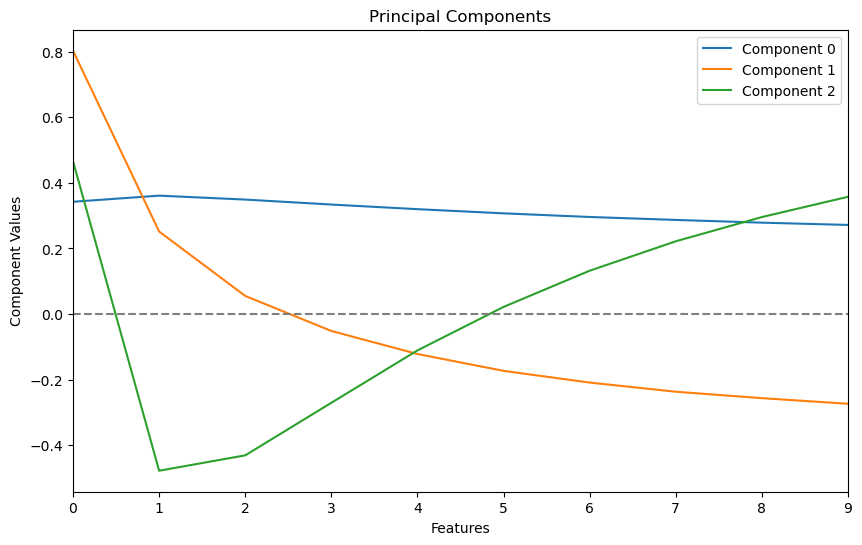

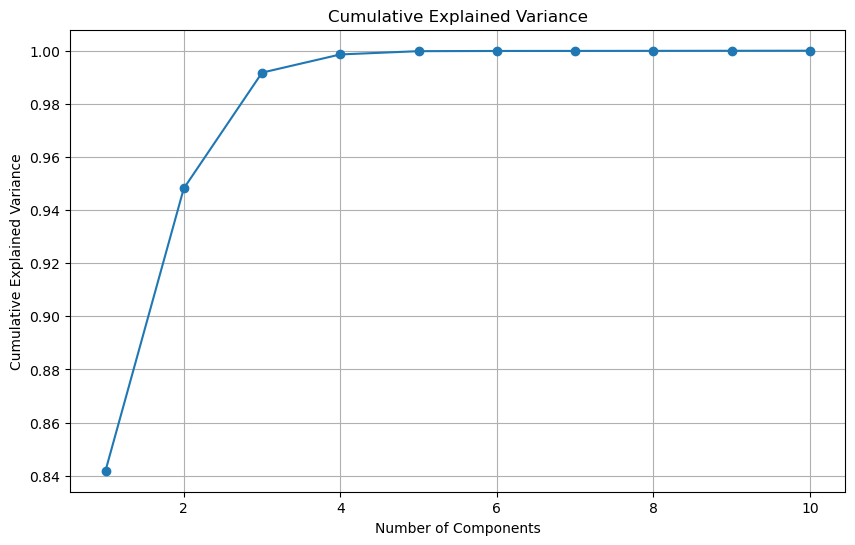

In [59]:
from sklearn.decomposition import PCA
eig_vals, eig_vecs = np.linalg.eig(dy_cov)
eig_vals, eig_vecs = np.linalg.eig(dy_cov)

def plot_explained_variance(eig_vals):
    explained_variance = np.cumsum(eig_vals) / np.sum(eig_vals)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

def plot_components(components):
    num_components = len(components)
    plt.figure(figsize=(10, 6))
    for i, comp in enumerate(components):
        plt.plot(comp, label=f'Component {i}')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('Principal Components')
    plt.xlabel('Features')
    plt.ylabel('Component Values')
    plt.xlim([0, 9])
    plt.legend()
    plt.show()

plot_components(eig_vecs[:,:3].T)
plot_explained_variance(eig_vals)


In [60]:
lsc_loadings = eig_vecs[:, :3].T # 3x10
y = df.iloc[:, 1:] # T x 10
pc_scores = y @ lsc_loadings.T # T x 3
dpc = pc_scores.diff().dropna() # T-1 x 3
dpc


,0,1,2
1,0.018634,0.001441,-0.008432
2,0.009833,0.013864,0.009226
3,-0.003362,-0.016923,-0.010392
4,-0.004983,-0.006381,0.003828
5,-0.001116,0.006582,0.001662
...,...,...,...
494,0.000628,-0.000714,0.000622
495,0.007468,-0.003019,0.000887
496,-0.009092,0.003763,-0.001223
497,-0.000274,0.000749,-0.000716


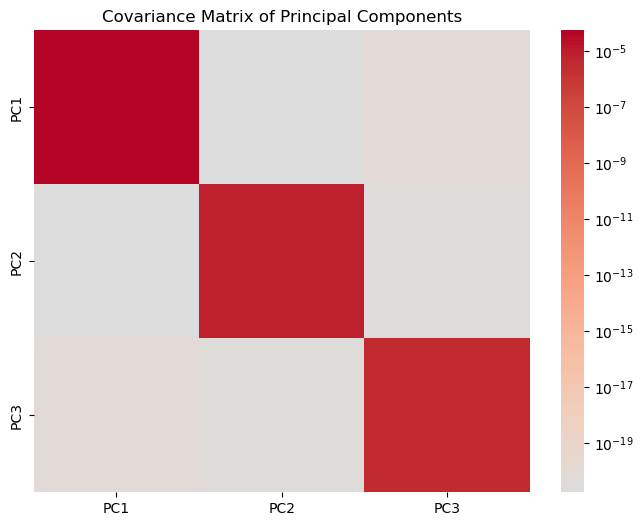

In [61]:
import seaborn as sns
from matplotlib.colors import LogNorm

pc_cov = np.cov(dpc.T)
plt.figure(figsize=(8, 6))
sns.heatmap(pc_cov, center=0, cmap='coolwarm', xticklabels=['PC1', 'PC2', 'PC3'], yticklabels=['PC1', 'PC2', 'PC3'], norm=LogNorm())
plt.title('Covariance Matrix of Principal Components')
plt.show()